<a href="https://colab.research.google.com/github/NjokiMbugua/spamdata-predictions-kNN-naive-bayes/blob/main/DSC9_Independent_Project_kNN_Week_9_Njoki_Mbugua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Defining the question

## a.Specific Question

Implementing a K-nearest neighbor (kNN) classifier on the titanic train set data using the 80:20,70:30 and 60:40 partitioning to predict passenger survival. 

## b.Defining Metrics for success

Create an accurate model that best predicts passenger survival.

## c.Understanding the context

Doing a background search to understand the titanic disaster and review the dataset description in order to be able to draw a concrete data analysis plan.

## d.Recording the experimental design

Data Cleaning

Exploratory Data Analysis

kNN model implementation

Improving Model Performance



## e.Data Relevance

Cross checking the data to ensure it is relevant to the topic of study and adequate enough to answer the research question.

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Reading and checking the data

In [ ]:
# train dataset url = /content/train (5).csv
# test dataset url = /content/test (1).csv
df = pd.read_csv('/content/train (5).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Checking the shape of the dataset
df.shape

(891, 12)

In [ ]:
# Checking the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Checking the information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Getting statistical summary of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# checking for unique values in each column using a for loop

for column in df.columns:           
  print(column)                                
  print(df[column].unique()) 
  print('\n')         
  print(df[column].nunique())
          

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [ ]:
df.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# There are null values in embarked, age and cabin columns.
# We replace the null values.
# Replacing the null value in age with the mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [ ]:
# Dropping null values in the embarked column and cabin columns
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# Dropping irrelevant columns
# Some columns are irrelevant to our prediction so we drop them
df.drop(columns=['PassengerId', 'Cabin','Name','Fare'], axis=1, inplace=True)


In [ ]:
df.drop(['Ticket'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
3,1,1,female,35.0,1,0,S
6,0,1,male,54.0,0,0,S
10,1,3,female,4.0,1,1,S
11,1,1,female,58.0,0,0,S
...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,S
872,0,1,male,33.0,0,0,S
879,1,1,female,56.0,0,1,C
887,1,1,female,19.0,0,0,S


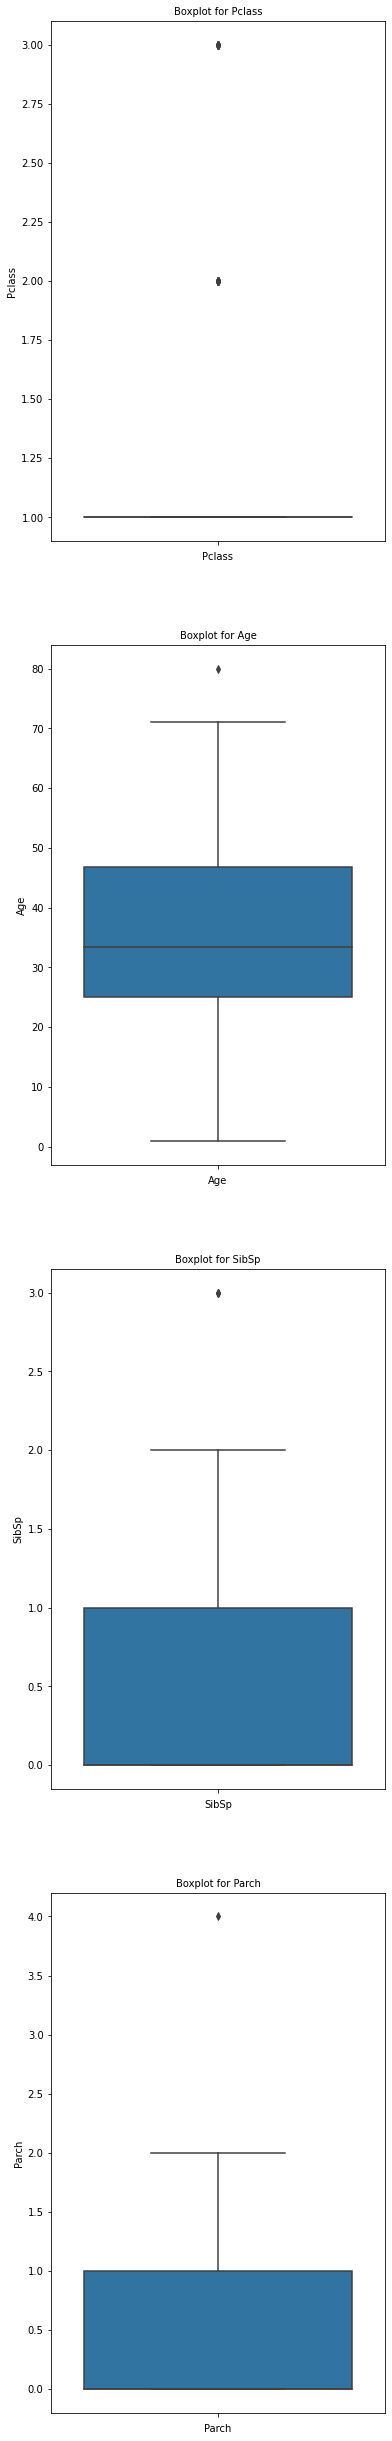

In [ ]:
# Checking for outliers for numeric variables
cols =cols = ['Pclass', 'Age', 'SibSp', 'Parch']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
        
    sns.boxplot(y=df[col_val], ax=axs[i])
    axs[i].set_title('Boxplot for '+col_val, fontsize=10)
    axs[i].set_xlabel(col_val, fontsize=10)

# Exploratory Data Analysis

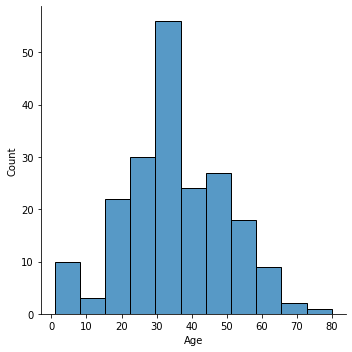

In [ ]:
# Histogram showing age distribution of the passengers
sns.displot(df.Age, kde=False);

Most of the passengers on board were aged between 20 to 50 years.

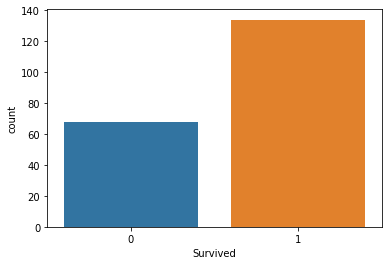

In [ ]:
# count plot showing how many pasengers survived
sns.countplot(x ='Survived', data = df)
 
# Show the plot
plt.show()

Survival (0 = No; 1 = Yes)

The survival rate was much higher than the death rate.

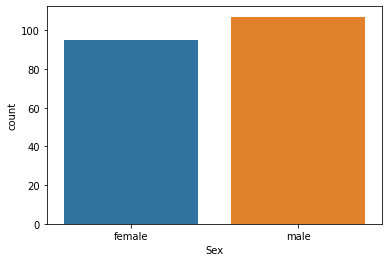

In [ ]:
# count plot on sex of the passengers
sns.countplot(x ='Sex', data = df)
 
# Show the plot
plt.show()

Most of the passengers on board were male.

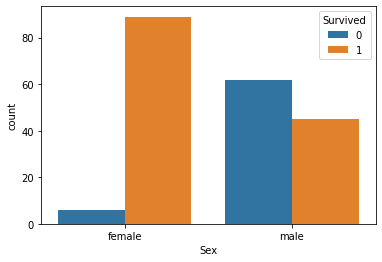

In [ ]:
# count plot on survival rate by sex
sns.countplot(x ='Sex', hue = "Survived", data = df)
 
# Show the plot
plt.show()

In comparison, there was a higher survival rate among the female passengers as opposed to male passengers where the death rate was higher.

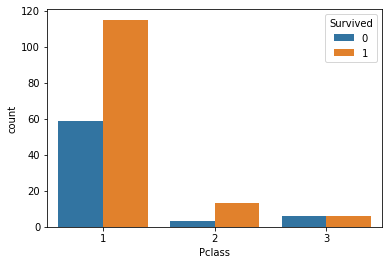

In [ ]:
# count plot showing the number of passengers that survived per class
sns.countplot(x ='Pclass', hue = "Survived", data = df)
 
# Show the plot
plt.show()

More people survived in the first class.

There was a higher rate of survival than death in second class

The survival and death rate was equal in third class.

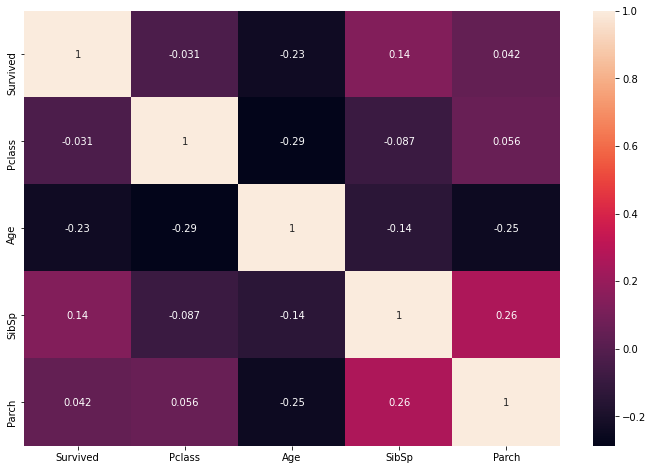

In [ ]:
# Heatmap showing correlation of variables
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

There's a weak correlation between the variables.

# Implementing the solution.

## a. Using 80:20 partitioning ratio

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
1,1,1,female,38.0,1,0,PC 17599,C
3,1,1,female,35.0,1,0,113803,S


In [ ]:
# Dropping more irrelevant columns
df.drop(columns=['Ticket', 'SibSp','Parch'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,Embarked
1,1,1,female,38.0,C
3,1,1,female,35.0,S


In [ ]:
# Using the 80-20 partitioning
# Import the relevant libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Defining the target and the predictor variables
X = df.drop('Survived', axis = 1)
y = df.Survived.values

In [ ]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[['Sex']] = df[['Sex']].apply(LabelEncoder().fit_transform)

In [ ]:
df[['Embarked']] = df[['Embarked']].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
1,1,1,0,38.0,0
3,1,1,0,35.0,2
6,0,1,1,54.0,2
10,1,3,0,4.0,2
11,1,1,0,58.0,2


In [ ]:
df['Sex'].unique()

array([0, 1])

In [ ]:
 X = pd.get_dummies(X)

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,Embarked
1,1,1,0,38.0,0
3,1,1,0,35.0,2


In [ ]:
# Splitting the dataset into training and testing (ratio of 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train the model with the help of KNeighbours classifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# make predictions
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
# print the results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

result =confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)
print('\n')
result1 = classification_report(y_test,y_pred)
print("Classification Report")
print(result1)
print('\n')
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix
[[ 7  7]
 [ 4 23]]


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.77      0.85      0.81        27

    accuracy                           0.73        41
   macro avg       0.70      0.68      0.68        41
weighted avg       0.72      0.73      0.72        41



Accuracy: 0.7317073170731707


Using the 80:20 ratio, the model achieved an accuracy of 73%.

## b. Using 70-30 partitioning ratio

In [ ]:
# Defining the target and the predictor variables
X = df.drop('Survived', axis = 1)
y = df.Survived.values

In [ ]:
# Splitting the dataset into training and testing (ratio of 70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
 X = pd.get_dummies(X)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train the model with the help of KNeighbours classifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# make predictions
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
# print the results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

result =confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)
print('\n')
result1 = classification_report(y_test,y_pred)
print("Classification Report")
print(result1)
print('\n')
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix
[[11  9]
 [ 7 34]]


Classification Report
              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.79      0.83      0.81        41

    accuracy                           0.74        61
   macro avg       0.70      0.69      0.69        61
weighted avg       0.73      0.74      0.73        61



Accuracy: 0.7377049180327869


Using 70-30 partitioning ratio, the model achieved an accuracy of 73.7%.

## c. Using 60-40 partitioning ratio

In [ ]:
# Defining the target and the predictor variables
X = df.drop('Survived', axis = 1)
y = df.Survived.values

In [ ]:
# Splitting the dataset into training and testing (ratio of 60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train the model with the help of KNeighbours classifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# make predictions
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
# print the results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

result =confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)
print('\n')
result1 = classification_report(y_test,y_pred)
print("Classification Report")
print(result1)
print('\n')
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix
[[15 12]
 [ 8 46]]


Classification Report
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.79      0.85      0.82        54

    accuracy                           0.75        81
   macro avg       0.72      0.70      0.71        81
weighted avg       0.75      0.75      0.75        81



Accuracy: 0.7530864197530864


Using 60-40 partitioning ratio, we achieved an accuracy of 75%.

## d. Hyperparameter Tuning to Improve Model Performance.

In [ ]:
# Import relevant libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
# List the hyperparameters to tune
grid_param = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
    'leaf_size': [10,20,30,40,50],
    'metric':['minkowski','euclidean'],
    'p': [1,2]
}

In [ ]:
# Instantiating GridSearchCV object
gd_sr= GridSearchCV(KNeighborsClassifier(), grid_param, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)

In [ ]:
# Calling the fit method
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#  Checking the parameters that return the highest accuracy
best_parameters = gd_sr.best_params_
print(best_parameters)

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}


From GridSearch, the best number of leaf_size is 10, while the best metric method is minkowski and the optimal number of K is 5.

In [ ]:
# Finding the obtained accuracy
best_result = gd_sr.best_score_
print(best_result)

0.7365384615384616


Using Hyperparameter Tuning has not improved the model performance. We achieved an accuracy of 73.6% which is almost similar to that achieved using the 80:20 and 70:30 partitioning ratios, and n_neighbours:5, with metric : euclidean, leaf size=30 and p=2.

The 60:40 partitioning had performed slightly better with an accuracy of 75%.

# Challenging the solution

We compare the kNN model performance with Random Forest to see which one performs better.

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Defining the target and the predictor variables
X = df.drop('Survived', axis = 1)
y = df.Survived.values

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 101)

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=20, min_samples_split = 20, max_depth=5)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
# making predictions
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
# Evaluating the accuracy of the model
result =confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)
print('\n')
result1 = classification_report(y_test,y_pred)
print("Classification Report")
print(result1)
print('\n')
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix
[[15 12]
 [10 44]]


Classification Report
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        27
           1       0.79      0.81      0.80        54

    accuracy                           0.73        81
   macro avg       0.69      0.69      0.69        81
weighted avg       0.72      0.73      0.73        81



Accuracy: 0.7283950617283951


Random Forest has a lower accuracy score compared to the kNN model.